# Yield Prediction
## Imports

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm.auto import tqdm
tqdm.pandas()

In [7]:
data_path = "../../../WorldCrops/data/cropdata/Bavaria"
sat_images_path = os.path.join(data_path, "yields/sat_images_10m")

## Data exploration

In [8]:
test_area = gpd.read_file(os.path.join(data_path, "Test_area.shp"))
test_area

,year,FID_1,Feldnummer,Schlag,NC_ant,Nutz_ant,Flaeche,Feld,area,geometry
0,2018,DEBYLI8318000240,9,1,592,Dauergr. aus der Erzeugung genommen,3.16,DEBYLI8318000240 9 1,3.840305,"POLYGON ((11.64185 48.39219, 11.64177 48.39224..."
1,2018,DEBYLI8310000056,52,1,115,Winterweizen (Weichweizen),0.73,DEBYLI8310000056 52 1,0.880725,"POLYGON ((11.61984 48.38011, 11.62100 48.38017..."
2,2018,DEBYLI8310000341,58,1,958,Naturschutzflaechen (keine landw. Verwertung),0.36,DEBYLI8310000341 58 1,0.442151,"POLYGON ((11.62244 48.38740, 11.62252 48.38735..."
3,2018,DEBYLI8318000126,343,1,115,Winterweizen (Weichweizen),1.36,DEBYLI8318000126 343 1,1.652525,"POLYGON ((11.65229 48.38673, 11.65261 48.38706..."
4,2018,DEBYLI8318000121,337,1,115,Winterweizen (Weichweizen),4.32,DEBYLI8318000121 337 1,5.243091,"POLYGON ((11.64572 48.38789, 11.64585 48.38705..."
...,...,...,...,...,...,...,...,...,...,...
296,2018,DEBYLI8310000347,45,2,996,"Unbefestigte Mieten. Stroh-, Futter- und Dungl...",0.06,DEBYLI8310000347 45 2,0.074861,"POLYGON ((11.63840 48.37505, 11.63889 48.37507..."
297,2018,DEBYLI8310000347,45,3,132,Sommergerste,2.17,DEBYLI8310000347 45 3,2.626510,"POLYGON ((11.63768 48.37700, 11.63799 48.37709..."
298,2018,DEBYLI8318000115,202,1,422,Kleegras - Klee-/Luzernegras-Gemisch,4.37,DEBYLI8318000115 202 1,5.301851,"POLYGON ((11.64870 48.39368, 11.64868 48.39298..."
299,2018,DEBYLI8318000117,206,1,121,Winterroggen,5.97,DEBYLI8318000117 206 1,7.246786,"POLYGON ((11.64856 48.39601, 11.64908 48.39585..."


In [9]:
yields_df = pd.read_csv(os.path.join(data_path, "yields/yields2018.csv"))
yields_df

,Elevation(m),Ertr.masse (Nass)(tonne/ha),Ertr.masse (Tr.)(tonne/ha),Ertr.vol (Tr.)(L/ha),ErtragNass,ErtragTr,Feuchtigkeit(%),Jahr,Latitude,Longitude,Name,TAG
0,515.26,2.257,2.257,3652.6,68.710855,68.645177,13.6,2018,48.429010,11.673614,Grafenfeld,UNI
1,515.25,2.899,2.899,4692.5,68.710855,68.645177,13.3,2018,48.429009,11.673595,Grafenfeld,UNI
2,515.23,3.410,3.410,5519.7,68.710855,68.645177,12.7,2018,48.429008,11.673574,Grafenfeld,UNI
3,515.24,4.134,4.134,6691.6,68.710855,68.645177,12.2,2018,48.429007,11.673554,Grafenfeld,UNI
4,515.26,4.830,4.830,7817.6,68.710855,68.645177,12.7,2018,48.429006,11.673535,Grafenfeld,UNI
...,...,...,...,...,...,...,...,...,...,...,...,...
132805,473.88,4.899,4.899,6343.6,83.499814,83.499170,12.1,2018,48.395223,11.702102,Voettingerfeld,UNI
132806,473.92,3.987,3.987,5162.2,83.499814,83.499170,12.0,2018,48.395232,11.702080,Voettingerfeld,UNI
132807,473.99,3.477,3.477,4502.2,83.499814,83.499170,12.3,2018,48.395242,11.702058,Voettingerfeld,UNI
132808,474.05,3.032,3.032,3926.1,83.499814,83.499170,12.4,2018,48.395253,11.702037,Voettingerfeld,UNI


In [10]:
yields_df[yields_df["Name"]=="Baumacker"]

,Elevation(m),Ertr.masse (Nass)(tonne/ha),Ertr.masse (Tr.)(tonne/ha),Ertr.vol (Tr.)(L/ha),ErtragNass,ErtragTr,Feuchtigkeit(%),Jahr,Latitude,Longitude,Name,TAG
27151,487.47,4.529,4.272,5531.8,81.277435,78.875297,18.4,2018,48.429650,11.731419,Baumacker,UNI
27152,487.49,6.730,6.349,8220.8,81.277435,78.875297,18.4,2018,48.429652,11.731420,Baumacker,UNI
27153,487.50,13.020,12.280,15904.0,81.277435,78.875297,18.4,2018,48.429654,11.731420,Baumacker,UNI
27154,487.53,18.180,17.150,22204.0,81.277435,78.875297,18.4,2018,48.429657,11.731421,Baumacker,UNI
27155,487.61,18.700,17.620,22817.0,81.277435,78.875297,18.5,2018,48.429670,11.731425,Baumacker,UNI
...,...,...,...,...,...,...,...,...,...,...,...,...
32542,488.48,3.362,3.268,4232.0,81.277435,78.875297,15.9,2018,48.429496,11.730961,Baumacker,UNI
32543,488.45,2.709,2.634,3410.8,81.277435,78.875297,15.9,2018,48.429497,11.730981,Baumacker,UNI
32544,488.43,1.870,1.819,2354.7,81.277435,78.875297,15.9,2018,48.429498,11.731001,Baumacker,UNI
32545,488.42,1.243,1.208,1564.3,81.277435,78.875297,15.9,2018,48.429499,11.731023,Baumacker,UNI


In [11]:
yields_df["Name"].unique()

array(['Grafenfeld', 'Krohberg', 'Radarstation', 'Sieblerfeld',
       'Striegelfeld', 'Baumacker', 'D2', 'D3', 'D4', 'D8', 'Dichtlacker',
       'Feldhof1', 'Feldhof1a', 'Feldhof2', 'Heindlacker', 'Heng',
       'Holzacker', 'Itzling2', 'Itzling4', 'Itzling5', 'Itzling6',
       'Muehlacker', 'Neulandsiedlung', 'Schluetterfabrik',
       'Thalhausen138', 'Thalhausen141', 'Viehhausen1', 'Viehhausen11',
       'Viehhausen3', 'Viehhausen5', 'Voettingerfeld'], dtype=object)

## Image preprocessing

In [12]:
# Get pixels of interest per field
# Create time series of reflectance values from those pixels

In [13]:
fields_of_interest =  ['Baumacker', 'D8', 'Dichtlacker', 'Heindlacker', 'Heng', 'Holzacker', 'Neulandsiedlung',
'Itzling2', 'Itzling5', 'Itzling6', 'Schluetterfabrik', 'Thalhausen138', 'Thalhausen141', 'Voettingerfeld']
pixels_per_field = {field:yields_df[yields_df["Name"]==field][["Latitude", "Longitude", "Ertr.masse (Nass)(tonne/ha)", "ErtragNass"]] for field in fields_of_interest}

In [14]:
pixels_per_field["Baumacker"]

,Latitude,Longitude,Ertr.masse (Nass)(tonne/ha),ErtragNass
27151,48.429650,11.731419,4.529,81.277435
27152,48.429652,11.731420,6.730,81.277435
27153,48.429654,11.731420,13.020,81.277435
27154,48.429657,11.731421,18.180,81.277435
27155,48.429670,11.731425,18.700,81.277435
...,...,...,...,...
32542,48.429496,11.730961,3.362,81.277435
32543,48.429497,11.730981,2.709,81.277435
32544,48.429498,11.731001,1.870,81.277435
32545,48.429499,11.731023,1.243,81.277435


In [15]:
import rasterio as rio

In [16]:
import json

In [17]:
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from tqdm.auto import tqdm
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
sns.set_theme()
sns.set_style("darkgrid")

tqdm.pandas()

In [18]:
def extract_date_from_url(url):
    idx = url.find("TIME=")
    return url[idx+5:idx+15]

In [19]:
def map_to_degrees(x):
    if x<0:
        x = 360+x
    else:
        x = x
    return x

In [20]:
from pyproj import Transformer

In [21]:
from rasterio.crs import CRS

In [22]:
def create_pixelwise_S2_data(yields_df, fields, path):
    s2_cols = ["CLM", "dataMask", "B01", "B02", "B03", "B04", "B05", "B06", "B07", "B08", \
               "B8A", "B09", "B11", "B12", "solar_azimuth", "solar_zenith", \
               "observer_azimuth", "observer_zenith", "unknown"]
    
    data = []
    for field in tqdm(fields):
        yield_data = yields_df[yields_df["Name"]==field][["Latitude", "Longitude", "Ertr.masse (Nass)(tonne/ha)", "ErtragNass"]]
        
        for img_dir in os.listdir(os.path.join(path, field)):
            # Read satellite image with rasterio                                             
            src = rio.open(os.path.join(path, field, img_dir, "response.tiff"), mode="r+")
            # Extract image time from json request                                             
            msg = json.loads(open(os.path.join(path, field, img_dir, "request.json")).read())
            img_date = extract_date_from_url(msg["url"])
            
            # Get reflectance values per pixel
            transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", authority="EPSG")
            yield_data["x"], yield_data["y"] = transformer.transform(yield_data["Latitude"], yield_data["Longitude"])
            
            s2_data = list(rio.sample.sample_gen(src, yield_data[["x", "y"]].values))
            try:
                temp_df = pd.DataFrame(s2_data, columns=s2_cols).drop_duplicates().join(yield_data.reset_index())
                
                temp_df["relative_azimuth"] = (temp_df["solar_azimuth"] - temp_df["observer_azimuth"])\
                                            .apply(map_to_degrees)
                
                temp_df["date"] = img_date
                temp_df["Name"] = field
                data.append(temp_df)
            except Exception as e:
                print(e)
                print("Failed to extract reflectance values from: {}".format(os.path.join(path, field, img_dir, "response.tiff")))
            
    data = pd.concat(data)                                           
    return data

In [150]:
# sat_df = create_pixelwise_S2_data(yields_df, fields_of_interest, sat_images_path)

  0%|          | 0/14 [00:00<?, ?it/s]

In [151]:
# sat_df.to_csv("../data/processed/yield/reflectance_per_pixel_10m.csv")

In [23]:
sat_df = pd.read_csv("../data/processed/yield/reflectance_per_pixel_10m.csv")

In [24]:
# sat_df = pd.read_csv("../data/processed/yield/reflectance_per_pixel.csv")
et0_df = pd.read_excel("../../../WorldCrops/data/cropdata/Bavaria/yields/satellite_data_orginal.xlsx")

In [25]:
def drop_unnamed_columns(df):
    """
    When saving/loading .csv files, the index is often saved as an unnamed column.
    This function removes any unnamed columns.
    
    Args:
        df (pd DataFrame): input DataFrame
    """
    
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]

def resample_and_merge_data(sat_df, et0_df, frequency="W"):
    """
    Creates a weekly or monthly resampled dataset from satellite data and rain/et0 data
    
    Args:
        sat_df (pd DataFrame): S2A reflectance data
        et0_df (pd DataFrame): rain/et0 data
        frequency (str): "W" for weekly or "M" for monthly
    """
    
    sat_df["date"] = pd.to_datetime(sat_df["date"])
    et0_df["date"] = pd.to_datetime(et0_df["date"])
    
    # Filter by cloud mask
    sat_df = sat_df[sat_df["CLM"]==0]
    
    # Resample reflectance data to frequency
    sat_df = sat_df.groupby("index").resample(frequency, on="date").mean().interpolate()
    sat_df = sat_df.reset_index("date")
    
    et0_df = et0_df[["date", "et0", "rain", "cum_rain"]].drop_duplicates()
    
    # Resample et0 data to frequency, starting at the same date as sat_df
    # Maybe it would be better to use a sum/mean over time for et0 and rain instead of resampling
    et0_df = et0_df.resample(frequency, on="date", origin=sat_df["date"].min()).mean().interpolate()
    et0_df = et0_df.reset_index("date")
    
    df = sat_df.merge(et0_df, left_on="date", right_on="date")
    df = drop_unnamed_columns(df)
    
    return df

In [ ]:
def invert_rtm(rtm_df, model, hyperparams, feature_cols, target_col="lai", do_cv=True):
        
    pipeline = Pipeline([('scaler', StandardScaler()), ('model', model(**hyperparams))])
    # Normally you would fit hyperparameters separately, 
    # for now just show cv score here to get an idea of inversion performance
    if do_cv:
        results = cross_validate(pipeline, X=rtm_df[feature_cols], y=rtm_df[target_col], cv=5,
                                scoring=('r2', 'neg_mean_squared_error'),
                                return_train_score=True)
        
        display("Inversion for {}".format(target_col))
        display("Mean train R2: {}, individual folds: {}".format(np.mean(results["train_r2"]), results["train_r2"]))
        display("Mean test R2: {}, individual folds: {}\n".format(np.mean(results["test_r2"]), results["test_r2"]))
        
    pipeline.fit(rtm_df[feature_cols], rtm_df[target_col])
    
    return pipeline

def create_dataset(bands, should_create_files=False, include_rtm=True, frequency="W"):
    data_path = "../../../master-thesis-public-data/data"
    if should_create_files:
        # To create locally:
        
#         sat_images_path = "sat_images"

#         yields_df = pd.read_csv(os.path.join(data_path, "../datayields2018.csv"))
        fields_of_interest =  ['Baumacker', 'D8', 'Dichtlacker', 'Heindlacker', 'Heng', 
                            'Holzacker', 'Neulandsiedlung','Itzling2', 'Itzling5', 
                            'Itzling6', 'Schluetterfabrik', 'Thalhausen138', 
                            'Thalhausen141', 'Voettingerfeld']
        
        sat_df = create_pixelwise_S2_data(yields_df, fields_of_interest, sat_images_path)
        # S2 values are scaled by a factor 10000
        sat_df[bands] = sat_df[bands] / 10000
        et0_df = pd.read_excel(os.path.join("../../../WorldCrops/data/cropdata/Bavaria/yields/satellite_data_orginal.xlsx"))

        df = resample_and_merge_data(sat_df, et0_df, frequency)

    else:
        # To simply load files that were already created:
        filename = "reflectance_per_pixel_weekly_10m_rtm.csv" \
                    if frequency=="W" else "reflectance_per_pixel_monthly_10m_rtm.csv"
        df = pd.read_csv(os.path.join(data_path, filename))

    if include_rtm:
        # For now use a similar simple model setup for RTM inversion
        rf = RandomForestRegressor
        hyperparams = {
            "n_jobs":-1, 
            "n_estimators":300,
            "max_depth":100,
            "max_features":'sqrt',
            "random_state":984
            }

        include_angles = True

        angles = ['solar_zenith', 'observer_zenith', 'relative_azimuth']
        features = bands+angles if include_angles else bands

        lai_model = invert_rtm(rtm_df, rf, hyperparams, feature_cols = features, target_col="lai")
        cm_model = invert_rtm(rtm_df, rf, hyperparams, feature_cols = features, target_col="cm")
        cab_model = invert_rtm(rtm_df, rf, hyperparams, feature_cols = features, target_col="cab")


        df["lai"] = lai_model.predict(df[features])
        df["cm"] = cm_model.predict(df[features])
        df["cab"] = cab_model.predict(df[features])

    return df

def flatten_time_series(df, feature_cols, target_col):
    """
    Flattens a dataset for use in a supervised model. Not suitable for recurrent models.
    
    Args:
        df (pd DataFrame):
        feature_cols (list of str): Feature column names
        target_col (str):

    return
        df (pd DataFrame):
        feature_cols (list of str): New feature column names with 
                                    suffix for each timestep, 
                                    e.g. _t-5 for 5 weeks/months before last timestep
    """

    out_df = []
    for field_index in df["index"].unique():
        sub_df = df[df["index"]==field_index]
        n_timesteps = len(sub_df)
        cols = list(np.array([[col+"_t-{}".format(i) for col in feature_cols] for i in reversed(range(n_timesteps))]).flatten())
        ts_df = pd.DataFrame(sub_df[feature_cols].values.flatten()).T
        ts_df.columns = cols
        ts_df[target_col] = sub_df.iloc[0][target_col]
        out_df.append(ts_df)
    return pd.concat(out_df).interpolate(), cols

rtm_df = pd.read_csv("../data/processed/yield/PROSAIL_LUT_Sentinel2_100000_winter_wheat.csv")
rtm_df = rtm_df.rename(columns={'B1':'B01', 'B2':'B02', 'B3':'B03', 'B4':'B04', \
                                'B5':'B05', 'B6':'B06', 'B7':'B07', 'B8':'B08', \
                                'B9':'B09'})

bands = ["B01", "B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", \
                "B09", "B11", "B12"]
angles = ['solar_zenith', 'observer_zenith', 'relative_azimuth']
other_features = ["et0", "rain", "cum_rain"]
feature_cols = bands + other_features
target_col = "Ertr.masse (Nass)(tonne/ha)"
rtm_cols = ["lai", "cm", "cab"]

df = create_dataset(bands=bands)
# df, feature_cols = flatten_time_series(df, feature_cols+angles+rtm_cols, target_col)

'Inversion for lai'

'Mean train R2: 0.9784091337637235, individual folds: [0.97840065 0.97834519 0.97842665 0.97850999 0.97836319]'

'Mean test R2: 0.8427311376280796, individual folds: [0.84242542 0.84268146 0.84174553 0.84375187 0.84305141]\n'

'Inversion for cm'

'Mean train R2: 0.9929609277737835, individual folds: [0.99295941 0.99300683 0.99296354 0.99287602 0.99299883]'

'Mean test R2: 0.9487218394891335, individual folds: [0.94878908 0.94791336 0.94855133 0.9500981  0.94825732]\n'

'Inversion for cab'

'Mean train R2: 0.9835657055992592, individual folds: [0.98350952 0.98353541 0.98359499 0.98363823 0.98355038]'

'Mean test R2: 0.8801849919316169, individual folds: [0.8826479  0.8800501  0.88066886 0.87755429 0.88000381]\n'

In [157]:
df.drop_duplicates()

,date,CLM,dataMask,B01,B02,B03,B04,B05,B06,B07,...,ErtragNass,x,y,relative_azimuth,et0,rain,cum_rain,lai,cm,cab
0,2018-03-11,0.0,1.0,0.000004,0.000006,0.000009,0.000009,0.000015,0.000026,0.000029,...,81.277435,1.305936e+06,6.178633e+06,227.105698,1.298619,0.128571,0.914286,5.905359,0.191130,62.295172
1,2018-03-11,0.0,1.0,0.000004,0.000006,0.000009,0.000009,0.000014,0.000024,0.000025,...,81.277435,1.305936e+06,6.178634e+06,227.105698,1.298619,0.128571,0.914286,5.905359,0.191130,62.295172
2,2018-03-11,0.0,1.0,0.000004,0.000005,0.000008,0.000009,0.000014,0.000024,0.000025,...,81.277435,1.305939e+06,6.178650e+06,227.105698,1.298619,0.128571,0.914286,5.905359,0.191130,62.295172
3,2018-03-11,0.0,1.0,0.000004,0.000005,0.000008,0.000009,0.000014,0.000022,0.000023,...,81.277435,1.305941e+06,6.178665e+06,227.105698,1.298619,0.128571,0.914286,5.905359,0.191130,62.295172
4,2018-03-11,0.0,1.0,0.000004,0.000005,0.000009,0.000008,0.000014,0.000022,0.000023,...,81.277435,1.305943e+06,6.178673e+06,227.105698,1.298619,0.128571,0.914286,5.905359,0.191130,62.295172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102013,2018-07-29,0.0,1.0,0.000003,0.000005,0.000007,0.000009,0.000011,0.000013,0.000015,...,83.499814,1.302663e+06,6.172793e+06,220.063522,4.420460,0.344000,321.342000,6.668758,0.189647,63.024204
102014,2018-07-29,0.0,1.0,0.000002,0.000005,0.000007,0.000009,0.000011,0.000013,0.000015,...,83.499814,1.302691e+06,6.172779e+06,220.063522,4.420460,0.344000,321.342000,6.668758,0.189647,63.024204
102015,2018-07-29,0.0,1.0,0.000002,0.000005,0.000007,0.000009,0.000011,0.000013,0.000015,...,83.499814,1.302726e+06,6.172763e+06,220.063522,4.420460,0.344000,321.342000,6.668758,0.189647,63.024204
102016,2018-07-29,0.0,1.0,0.000002,0.000005,0.000007,0.000009,0.000011,0.000013,0.000015,...,83.499814,1.302731e+06,6.172761e+06,220.063522,4.420460,0.344000,321.342000,6.668758,0.189647,63.024204


In [158]:
df.describe()

,CLM,dataMask,B01,B02,B03,B04,B05,B06,B07,B08,...,ErtragNass,x,y,relative_azimuth,et0,rain,cum_rain,lai,cm,cab
count,102018.0,102018.000000,102018.000000,102018.000000,102018.000000,102018.000000,102018.000000,102018.000000,102018.000000,102018.000000,...,102018.000000,1.020180e+05,1.020180e+05,102018.000000,102018.000000,102018.000000,102018.000000,102018.000000,102018.000000,102018.000000
mean,0.0,0.998736,0.000004,0.000005,0.000008,0.000008,0.000012,0.000023,0.000027,0.000029,...,70.338592,1.303783e+06,6.174996e+06,183.131948,3.343641,2.164102,123.224735,6.527093,0.189800,62.825106
std,0.0,0.035416,0.000001,0.000002,0.000002,0.000003,0.000004,0.000005,0.000008,0.000008,...,9.754747,2.826484e+03,3.923652e+03,58.348248,1.083319,2.578559,103.984489,0.255483,0.000569,0.251954
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54.662237,1.298501e+06,6.169467e+06,0.000000,1.140500,0.014000,0.914286,5.905359,0.187006,62.103734
25%,0.0,1.000000,0.000003,0.000004,0.000006,0.000005,0.000009,0.000019,0.000022,0.000023,...,63.157894,1.300809e+06,6.170964e+06,134.810253,2.957743,0.248148,33.482857,6.377019,0.189341,62.670454
50%,0.0,1.000000,0.000004,0.000005,0.000007,0.000007,0.000012,0.000023,0.000027,0.000028,...,67.366006,1.304904e+06,6.174010e+06,219.136688,3.756533,1.596491,85.380952,6.668758,0.189704,62.891706
75%,0.0,1.000000,0.000005,0.000006,0.000009,0.000010,0.000014,0.000027,0.000034,0.000035,...,78.922790,1.305964e+06,6.179127e+06,225.487609,4.110596,2.797959,222.228000,6.679067,0.190118,63.024204
max,0.0,1.000000,0.000016,0.000022,0.000024,0.000026,0.000027,0.000042,0.000053,0.000060,...,85.293056,1.307162e+06,6.179747e+06,227.189133,4.423400,8.588095,321.342000,6.743057,0.191143,63.470668


In [159]:
df.to_csv("../data/processed/yield/reflectance_per_pixel_weekly_10m_rtm.csv")

In [160]:
df = create_dataset(bands=bands, frequency="M")
df.to_csv("../data/processed/yield/reflectance_per_pixel_monthly_10m_rtm.csv")

  0%|          | 0/14 [00:00<?, ?it/s]

,date,CLM,dataMask,B01,B02,B03,B04,B05,B06,B07,...,ErtragNass,x,y,relative_azimuth,et0,rain,cum_rain,lai,cm,cab
0,2018-03-31,0.0,1.0,0.000005,0.000007,0.000010,0.000010,0.000015,0.000026,0.000029,...,81.277435,1.305936e+06,6.178633e+06,135.152699,1.285495,0.979439,13.717757,6.071706,0.190611,62.408232
1,2018-03-31,0.0,1.0,0.000004,0.000007,0.000010,0.000010,0.000015,0.000024,0.000026,...,81.277435,1.305936e+06,6.178634e+06,135.152699,1.285495,0.979439,13.717757,6.071706,0.190611,62.408232
2,2018-03-31,0.0,1.0,0.000004,0.000006,0.000010,0.000010,0.000015,0.000024,0.000026,...,81.277435,1.305939e+06,6.178650e+06,135.152699,1.285495,0.979439,13.717757,6.071706,0.190611,62.408232
3,2018-03-31,0.0,1.0,0.000004,0.000007,0.000010,0.000010,0.000015,0.000023,0.000025,...,81.277435,1.305941e+06,6.178665e+06,135.152699,1.285495,0.979439,13.717757,6.071706,0.190611,62.408232
4,2018-03-31,0.0,1.0,0.000004,0.000007,0.000010,0.000009,0.000015,0.000023,0.000025,...,81.277435,1.305943e+06,6.178673e+06,135.152699,1.285495,0.979439,13.717757,6.071706,0.190611,62.408232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24285,2018-07-31,0.0,1.0,0.000003,0.000004,0.000007,0.000007,0.000011,0.000017,0.000020,...,83.499814,1.302663e+06,6.172793e+06,219.136688,4.263155,2.243805,282.844248,6.669180,0.189640,62.996794
24286,2018-07-31,0.0,1.0,0.000002,0.000004,0.000006,0.000007,0.000011,0.000017,0.000020,...,83.499814,1.302691e+06,6.172779e+06,219.136688,4.263155,2.243805,282.844248,6.669180,0.189640,62.996794
24287,2018-07-31,0.0,1.0,0.000002,0.000004,0.000006,0.000007,0.000011,0.000017,0.000020,...,83.499814,1.302726e+06,6.172763e+06,219.136688,4.263155,2.243805,282.844248,6.669180,0.189640,62.996794
24288,2018-07-31,0.0,1.0,0.000002,0.000004,0.000006,0.000007,0.000011,0.000017,0.000020,...,83.499814,1.302731e+06,6.172761e+06,219.136688,4.263155,2.243805,282.844248,6.669180,0.189640,62.996794


,lai,cm,cab
count,24290.000000,24290.000000,24290.000000
mean,6.523497,0.189903,62.826098
std,0.273079,0.000609,0.285628
min,5.905359,0.187006,62.295172
25%,6.546821,0.189640,62.539826
50%,6.669180,0.189745,62.906866
75%,6.683508,0.190207,63.058418
max,6.733041,0.191143,63.306808


<AxesSubplot:>

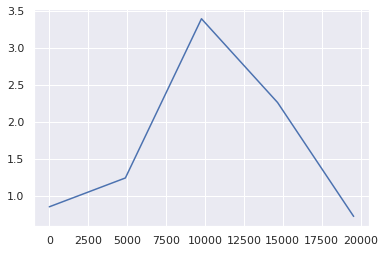

In [126]:
df[df["index"]==27151]["lai"].plot()

In [162]:
pd.read_csv("../data/processed/yield/reflectance_per_pixel_weekly_10m_rtm.csv")

,Unnamed: 0,date,CLM,dataMask,B01,B02,B03,B04,B05,B06,...,ErtragNass,x,y,relative_azimuth,et0,rain,cum_rain,lai,cm,cab
0,0,2018-03-11,0.0,1.0,0.000004,0.000006,0.000009,0.000009,0.000015,0.000026,...,81.277435,1.305936e+06,6.178633e+06,227.105698,1.298619,0.128571,0.914286,5.905359,0.191130,62.295172
1,1,2018-03-11,0.0,1.0,0.000004,0.000006,0.000009,0.000009,0.000014,0.000024,...,81.277435,1.305936e+06,6.178634e+06,227.105698,1.298619,0.128571,0.914286,5.905359,0.191130,62.295172
2,2,2018-03-11,0.0,1.0,0.000004,0.000005,0.000008,0.000009,0.000014,0.000024,...,81.277435,1.305939e+06,6.178650e+06,227.105698,1.298619,0.128571,0.914286,5.905359,0.191130,62.295172
3,3,2018-03-11,0.0,1.0,0.000004,0.000005,0.000008,0.000009,0.000014,0.000022,...,81.277435,1.305941e+06,6.178665e+06,227.105698,1.298619,0.128571,0.914286,5.905359,0.191130,62.295172
4,4,2018-03-11,0.0,1.0,0.000004,0.000005,0.000009,0.000008,0.000014,0.000022,...,81.277435,1.305943e+06,6.178673e+06,227.105698,1.298619,0.128571,0.914286,5.905359,0.191130,62.295172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102013,102013,2018-07-29,0.0,1.0,0.000003,0.000005,0.000007,0.000009,0.000011,0.000013,...,83.499814,1.302663e+06,6.172793e+06,220.063522,4.420460,0.344000,321.342000,6.668758,0.189647,63.024204
102014,102014,2018-07-29,0.0,1.0,0.000002,0.000005,0.000007,0.000009,0.000011,0.000013,...,83.499814,1.302691e+06,6.172779e+06,220.063522,4.420460,0.344000,321.342000,6.668758,0.189647,63.024204
102015,102015,2018-07-29,0.0,1.0,0.000002,0.000005,0.000007,0.000009,0.000011,0.000013,...,83.499814,1.302726e+06,6.172763e+06,220.063522,4.420460,0.344000,321.342000,6.668758,0.189647,63.024204
102016,102016,2018-07-29,0.0,1.0,0.000002,0.000005,0.000007,0.000009,0.000011,0.000013,...,83.499814,1.302731e+06,6.172761e+06,220.063522,4.420460,0.344000,321.342000,6.668758,0.189647,63.024204


## Time series

In [163]:
df = pd.read_csv("../data/processed/yield/reflectance_per_pixel_weekly_10m_rtm.csv")

In [164]:
df.head()

,Unnamed: 0,date,CLM,dataMask,B01,B02,B03,B04,B05,B06,...,ErtragNass,x,y,relative_azimuth,et0,rain,cum_rain,lai,cm,cab
0,0,2018-03-11,0.0,1.0,0.000004,0.000006,0.000009,0.000009,0.000015,0.000026,...,81.277435,1.305936e+06,6.178633e+06,227.105698,1.298619,0.128571,0.914286,5.905359,0.19113,62.295172
1,1,2018-03-11,0.0,1.0,0.000004,0.000006,0.000009,0.000009,0.000014,0.000024,...,81.277435,1.305936e+06,6.178634e+06,227.105698,1.298619,0.128571,0.914286,5.905359,0.19113,62.295172
2,2,2018-03-11,0.0,1.0,0.000004,0.000005,0.000008,0.000009,0.000014,0.000024,...,81.277435,1.305939e+06,6.178650e+06,227.105698,1.298619,0.128571,0.914286,5.905359,0.19113,62.295172
3,3,2018-03-11,0.0,1.0,0.000004,0.000005,0.000008,0.000009,0.000014,0.000022,...,81.277435,1.305941e+06,6.178665e+06,227.105698,1.298619,0.128571,0.914286,5.905359,0.19113,62.295172
4,4,2018-03-11,0.0,1.0,0.000004,0.000005,0.000009,0.000008,0.000014,0.000022,...,81.277435,1.305943e+06,6.178673e+06,227.105698,1.298619,0.128571,0.914286,5.905359,0.19113,62.295172


In [165]:
feature_cols = ["B01", "B02", "B03", "B04","B05", "B06","B07", "B08","B8A", "B09", "B11","B12"]

In [166]:
def flatten_time_series(df, feature_cols, target_col):
    out_df = []
    for field_index in df["index"].unique():
        sub_df = df[df["index"]==field_index]
        n_timesteps = len(sub_df)
        cols = list(np.array([[col+"_t-{}".format(i) for col in feature_cols] for i in reversed(range(n_timesteps))]).flatten())
        ts_df = pd.DataFrame(sub_df[feature_cols].values.flatten()).T
        ts_df.columns = cols
        ts_df[target_col] = sub_df.iloc[0][target_col]
        out_df.append(ts_df)
    return pd.concat(out_df).interpolate(), cols

In [167]:
out_df, feature_cols = flatten_time_series(df, feature_cols, "Ertr.masse (Nass)(tonne/ha)")

In [241]:
out_df.to_csv("../data/processed/yield/reflectance_per_pixel_monthly_flat.csv")

In [168]:
from sklearn.model_selection import cross_validate

In [169]:
rf = RandomForestRegressor(n_jobs=4, n_estimators=100)

target_col = "Ertr.masse (Nass)(tonne/ha)"
# feature_cols = list(range(0, 326))

results = cross_validate(rf, X=out_df[feature_cols], y=out_df[target_col], cv=5,
                         scoring=('r2', 'neg_mean_squared_error'),
                         return_train_score=True)
results

{'fit_time': array([9.47135878, 8.91503978, 9.51945662, 9.68890595, 9.52746844]),
 'score_time': array([0.10810161, 0.11000037, 0.11109662, 0.11301589, 0.10899019]),
 'test_r2': array([ 0.28828725,  0.41758745, -0.06644004,  0.32546741,  0.16663501]),
 'train_r2': array([0.93887158, 0.93916082, 0.93880195, 0.93678993, 0.93796376]),
 'test_neg_mean_squared_error': array([-3.52684348, -1.57863831, -3.40738399, -2.14944843, -3.62015101]),
 'train_neg_mean_squared_error': array([-0.23160921, -0.26634714, -0.2462292 , -0.26280349, -0.23495519])}

## Static

In [77]:
feature_cols = ["et0", "rain", 'B1_mean', 'B2_mean', 'B3_mean', 'B4_mean', 'B5_mean', 'B6_mean', 'B7_mean',
                'B8_mean', 'B8A_mean', 'B9_mean', 'B10_mean', 'B11_mean', 'B12_mean',]
in_situ_df = in_situ_df.dropna()

In [78]:
rf = RandomForestRegressor(n_jobs=4, n_estimators=1000)

target_col = "Ertrag"

results = cross_validate(rf, X=in_situ_df[feature_cols], y=in_situ_df[target_col], cv=5,
                         scoring=('r2', 'neg_mean_squared_error'),
                         return_train_score=True)
results

{'fit_time': array([0.92944336, 0.94700789, 0.920012  , 0.94196844, 0.9351635 ]),
 'score_time': array([0.10305023, 0.10293365, 0.10304761, 0.10312653, 0.10445619]),
 'test_r2': array([ 0.14190009, -0.69674075, -0.04990232, -1.4510491 , -0.64719425]),
 'train_r2': array([0.85992284, 0.8732621 , 0.87217938, 0.86767343, 0.87356072]),
 'test_neg_mean_squared_error': array([ -81.78817205,  -60.01646728,  -87.41764172,  -83.37459126,
        -165.01954519]),
 'train_neg_mean_squared_error': array([-11.41606443, -12.20693057, -10.77679489, -11.75606702,
         -8.54731103])}

# Experiment LSTM

In [242]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score

In [258]:
help(keras.layers.LSTM)

Help on class LSTM in module tensorflow.python.keras.layers.recurrent:

class LSTM(RNN)
 |  LSTM(units, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False, **kwargs)
 |  
 |  Long Short-Term Memory layer - Hochreiter 1997.
 |  
 |   Note that this cell is not optimized for performance on GPU. Please use
 |  `tf.compat.v1.keras.layers.CuDNNLSTM` for better performance on GPU.
 |  
 |  Arguments:
 |    units: Positive integer, dimensionality of the output space.
 |    activation: Activation function to use.
 |      Default: hyperbo

In [243]:
df

,Name,index,date,Unnamed: 0,dataMask,CLM,B01,B02,B03,B04,...,B08,B8A,B09,B11,B12,index.1,Latitude,Longitude,Ertr.masse (Nass)(tonne/ha),ErtragNass
0,Baumacker,27151,2018-02-28,0.0,0.00,1.0,5643.00,5838.50,5563.5,5578.50,...,5403.50,5190.00,5318.50,447.00,472.50,27151.0,48.42965,11.731419,4.529,81.277435
1,Baumacker,27151,2018-03-31,0.0,0.00,1.0,448.50,669.50,985.5,982.00,...,2355.00,2737.50,2456.50,1977.50,1245.50,27151.0,48.42965,11.731419,4.529,81.277435
2,Baumacker,27151,2018-04-30,0.0,0.00,1.0,379.40,503.80,823.0,709.00,...,3538.00,3870.00,3688.20,1863.40,1131.40,27151.0,48.42965,11.731419,4.529,81.277435
3,Baumacker,27151,2018-05-31,0.0,0.00,1.0,193.50,273.50,458.0,355.00,...,4196.00,4617.00,4180.00,1314.00,692.00,27151.0,48.42965,11.731419,4.529,81.277435
4,Baumacker,27151,2018-06-30,0.0,0.00,1.0,329.00,452.00,635.5,508.50,...,4366.50,4711.50,4479.50,1822.00,1006.00,27151.0,48.42965,11.731419,4.529,81.277435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34201,Voettingerfeld,132654,2018-04-30,1675.0,0.00,1.0,293.25,435.50,776.0,642.25,...,3527.00,3470.75,3182.75,2061.75,1300.50,132654.0,48.39460,11.702753,10.030,83.499814
34202,Voettingerfeld,132654,2018-05-31,1675.0,0.00,1.0,199.50,332.50,625.5,547.00,...,3451.00,3462.00,3488.00,1724.00,1012.50,132654.0,48.39460,11.702753,10.030,83.499814
34203,Voettingerfeld,132654,2018-06-30,1675.0,0.50,1.0,1513.00,1275.00,1497.0,1524.50,...,3039.00,3244.00,4160.50,1909.50,1330.00,132654.0,48.39460,11.702753,10.030,83.499814
34204,Voettingerfeld,132654,2018-07-31,1675.0,0.25,1.0,368.75,603.75,841.5,998.25,...,2240.75,2332.50,2332.00,2181.50,1439.75,132654.0,48.39460,11.702753,10.030,83.499814


In [250]:
feature_cols = ["B01", "B02", "B03", "B04","B05", "B06","B07", "B08","B8A", "B09", "B11","B12"]

In [535]:
n_timesteps = df["index"].value_counts().iloc[0]
n_features = len(feature_cols)
inputs = keras.layers.Input(shape=(n_timesteps, n_features))
lstm_out = keras.layers.LSTM(256, return_sequences=True, activation="relu")(inputs)
lstm_out = keras.layers.LSTM(128, return_sequences=False, activation="relu")(lstm_out)
lstm_out = keras.layers.BatchNormalization()(lstm_out)
lstm_out = keras.layers.Dense(64)(lstm_out)
lstm_out = keras.layers.BatchNormalization()(lstm_out)

outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 7, 12)]           0         
_________________________________________________________________
lstm_40 (LSTM)               (None, 7, 256)            275456    
_________________________________________________________________
lstm_41 (LSTM)               (None, 128)               197120    
_________________________________________________________________
batch_normalization_26 (Batc (None, 128)               512       
_________________________________________________________________
dense_39 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_27 (Batc (None, 64)                256       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 65 

In [536]:
targets = df.groupby("index")[target_col].mean()

In [537]:
# Rows that only have 6 timesteps
df.groupby("index").sum()[df.groupby("index").count()["Name"]<7]

,Unnamed: 0,dataMask,CLM,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12,index.1,Latitude,Longitude,Ertr.masse (Nass)(tonne/ha),ErtragNass
index,,,,,,,,,,,,,,,,,,,,
131191,848.0,0.0,4.0,1729.9,2371.30,3558.1,3831.4,5291.3,8182.50,9319.3,9342.5,9861.50,9716.4,8585.60,5873.2,524764.0,193.579595,46.814276,31.632,333.999257
131368,1167.0,0.0,3.0,941.5,1622.75,2635.5,2863.5,3532.5,6121.75,7180.0,7437.5,7627.75,7282.0,6420.25,4467.5,394104.0,145.185254,35.110714,23.949,250.499443


In [538]:
# feature_cols = ["et0", "rain", 'B1_mean', 'B2_mean', 'B3_mean', 'B4_mean', 'B5_mean', 'B6_mean', 'B7_mean',
#                 'B8_mean', 'B8A_mean', 'B9_mean', 'B10_mean', 'B11_mean', 'B12_mean',]
time_series = [df[df["index"] == index][feature_cols].values[:n_timesteps] for index in df["index"].unique() if index not in [131191, 131368]]
# time_series = np.array([np.array(ts.values) for ts in time_series])
# time_series.shape
X = np.dstack(time_series)
X = np.moveaxis(X, [0, 1, 2], [1, 2, 0])

In [539]:
pd.DataFrame(X[0])

,0,1,2,3,4,5,6,7,8,9,10,11
0,5643.000000,5838.500000,5563.50,5578.5,5622.500000,5556.000000,5396.000000,5403.500000,5190.000000,5318.500000,447.0,472.500000
1,448.500000,669.500000,985.50,982.0,1476.500000,2402.000000,2638.500000,2355.000000,2737.500000,2456.500000,1977.5,1245.500000
2,379.400000,503.800000,823.00,709.0,1127.800000,2960.400000,3784.400000,3538.000000,3870.000000,3688.200000,1863.4,1131.400000
3,193.500000,273.500000,458.00,355.0,706.500000,2938.500000,4315.500000,4196.000000,4617.000000,4180.000000,1314.0,692.000000
4,329.000000,452.000000,635.50,508.5,1293.000000,3122.500000,4312.000000,4366.500000,4711.500000,4479.500000,1822.0,1006.000000
5,361.250000,490.000000,754.75,961.0,1347.750000,1789.000000,1988.500000,2166.000000,2246.000000,2225.500000,2134.5,1514.500000
6,624.333333,1003.833333,1451.00,1959.0,2183.166667,2998.166667,3295.833333,2968.833333,3519.333333,3294.333333,3542.5,2585.666667


In [540]:
X_train = X[:3000]
y_train = targets.drop(index=[131191, 131368])[:3000]
X_test = X[3000:]
y_test = targets.drop(index=[131191, 131368])[3000:]

model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1)

Epoch 1/100
3000/3000 [==============================] - 4s 1ms/sample - loss: 64.6625
Epoch 2/100
3000/3000 [==============================] - 1s 214us/sample - loss: 59.9126
Epoch 3/100
3000/3000 [==============================] - 1s 214us/sample - loss: 55.6421
Epoch 4/100
3000/3000 [==============================] - 1s 219us/sample - loss: 49.1754
Epoch 5/100
3000/3000 [==============================] - 1s 215us/sample - loss: 41.6904
Epoch 6/100
3000/3000 [==============================] - 1s 212us/sample - loss: 33.3297
Epoch 7/100
3000/3000 [==============================] - 1s 213us/sample - loss: 25.1398
Epoch 8/100
3000/3000 [==============================] - 1s 219us/sample - loss: 17.7675
Epoch 9/100
3000/3000 [==============================] - 1s 217us/sample - loss: 11.6579
Epoch 10/100
3000/3000 [==============================] - 1s 215us/sample - loss: 7.4147
Epoch 11/100
3000/3000 [==============================] - 1s 215us/sample - loss: 4.8645
Epoch 12/100
3000/3000 

3000/3000 [==============================] - 1s 236us/sample - loss: 2.1415
Epoch 94/100
3000/3000 [==============================] - 1s 229us/sample - loss: 2.1367
Epoch 95/100
3000/3000 [==============================] - 1s 229us/sample - loss: 2.2062
Epoch 96/100
3000/3000 [==============================] - 1s 229us/sample - loss: 2.1366
Epoch 97/100
3000/3000 [==============================] - 1s 229us/sample - loss: 2.1872
Epoch 98/100
3000/3000 [==============================] - 1s 235us/sample - loss: 2.1896
Epoch 99/100
3000/3000 [==============================] - 1s 227us/sample - loss: 2.1729
Epoch 100/100
3000/3000 [==============================] - 1s 231us/sample - loss: 2.2093


In [541]:
y_pred = model.predict(X_test)

In [542]:
y_pred

array([[6.3549976],
       [6.1316085],
       [6.4828024],
       ...,
       [7.9581394],
       [8.073796 ],
       [8.126399 ]], dtype=float32)

In [543]:
r2_score(y_pred, y_test)

-1.610816949210907

In [544]:
np.mean(y_train)

7.879400333333334

In [545]:
np.mean(y_pred)

5.7949777

In [546]:
np.mean(y_test)

6.647479575596817

In [83]:
df = pd.read_csv("../data/processed/yield/reflectance_per_pixel_weekly_10m.csv")

In [84]:
bands = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12']

In [85]:
df

,Unnamed: 0,date,CLM,dataMask,B01,B02,B03,B04,B05,B06,...,Latitude,Longitude,Ertr.masse (Nass)(tonne/ha),ErtragNass,x,y,relative_azimuth,et0,rain,cum_rain
0,0,2018-03-11,0,1.0,0.000004,0.000006,0.000009,0.000009,0.000015,0.000026,...,48.429650,11.731419,4.529,81.277435,1.305936e+06,6.178633e+06,227.105698,1.298619,0.128571,0.914286
1,1,2018-03-11,0,1.0,0.000004,0.000006,0.000009,0.000009,0.000014,0.000024,...,48.429654,11.731420,13.020,81.277435,1.305936e+06,6.178634e+06,227.105698,1.298619,0.128571,0.914286
2,2,2018-03-11,0,1.0,0.000004,0.000005,0.000008,0.000009,0.000014,0.000024,...,48.429748,11.731447,9.495,81.277435,1.305939e+06,6.178650e+06,227.105698,1.298619,0.128571,0.914286
3,3,2018-03-11,0,1.0,0.000004,0.000005,0.000008,0.000009,0.000014,0.000022,...,48.429838,11.731470,10.010,81.277435,1.305941e+06,6.178665e+06,227.105698,1.298619,0.128571,0.914286
4,4,2018-03-11,0,1.0,0.000004,0.000005,0.000009,0.000008,0.000014,0.000022,...,48.429886,11.731482,9.110,81.277435,1.305943e+06,6.178673e+06,227.105698,1.298619,0.128571,0.914286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102013,102013,2018-07-29,0,1.0,0.000003,0.000005,0.000007,0.000009,0.000011,0.000013,...,48.394829,11.702024,10.220,83.499814,1.302663e+06,6.172793e+06,220.063522,4.420460,0.344000,321.342000
102014,102014,2018-07-29,0,1.0,0.000002,0.000005,0.000007,0.000009,0.000011,0.000013,...,48.394741,11.702275,9.798,83.499814,1.302691e+06,6.172779e+06,220.063522,4.420460,0.344000,321.342000
102015,102015,2018-07-29,0,1.0,0.000002,0.000005,0.000007,0.000009,0.000011,0.000013,...,48.394647,11.702585,9.316,83.499814,1.302726e+06,6.172763e+06,220.063522,4.420460,0.344000,321.342000
102016,102016,2018-07-29,0,1.0,0.000002,0.000005,0.000007,0.000009,0.000011,0.000013,...,48.394635,11.702628,8.950,83.499814,1.302731e+06,6.172761e+06,220.063522,4.420460,0.344000,321.342000


In [86]:
df.columns

Index(['Unnamed: 0', 'date', 'CLM', 'dataMask', 'B01', 'B02', 'B03', 'B04',
       'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12', 'solar_azimuth',
       'solar_zenith', 'observer_azimuth', 'observer_zenith', 'unknown',
       'index', 'Latitude', 'Longitude', 'Ertr.masse (Nass)(tonne/ha)',
       'ErtragNass', 'x', 'y', 'relative_azimuth', 'et0', 'rain', 'cum_rain'],
      dtype='object')

In [87]:
df[bands] = df[bands]*10000

In [88]:
df[bands] = df[bands].replace(0, np.nan)

In [90]:
df = df.sort_values(by=["index", "date"])

In [91]:
df[bands] = df[bands].interpolate()

In [92]:
df.describe()

,Unnamed: 0,CLM,dataMask,B01,B02,B03,B04,B05,B06,B07,...,Latitude,Longitude,Ertr.masse (Nass)(tonne/ha),ErtragNass,x,y,relative_azimuth,et0,rain,cum_rain
count,102018.000000,102018.0,102018.000000,102018.000000,102018.000000,102018.000000,102018.000000,102018.000000,102018.000000,102018.000000,...,102018.000000,102018.000000,102018.000000,102018.000000,1.020180e+05,1.020180e+05,102018.000000,102018.000000,102018.000000,102018.000000
mean,51008.500000,0.0,0.998736,0.037261,0.051428,0.077797,0.078803,0.119722,0.225651,0.273326,...,48.407962,11.712080,7.393423,70.338592,1.303783e+06,6.174996e+06,183.131948,3.343641,2.164102,123.224735
std,29450.204218,0.0,0.035416,0.013802,0.017917,0.024046,0.034252,0.036444,0.052982,0.076875,...,0.023398,0.025391,2.012544,9.754747,2.826484e+03,3.923652e+03,58.348248,1.083319,2.578559,103.984489
min,0.000000,0.0,0.000000,0.000900,0.007700,0.012500,0.009200,0.014800,0.025100,0.027400,...,48.374981,11.664637,0.360000,54.662237,1.298501e+06,6.169467e+06,0.000000,1.140500,0.014000,0.914286
25%,25504.250000,0.0,1.000000,0.027750,0.039100,0.060650,0.053150,0.094400,0.192175,0.217000,...,48.383918,11.685369,6.111000,63.157894,1.300809e+06,6.170964e+06,134.810253,2.957743,0.248148,33.482857
50%,51008.500000,0.0,1.000000,0.035300,0.048450,0.073925,0.073800,0.115800,0.230650,0.268200,...,48.402087,11.722150,7.593000,67.366006,1.304904e+06,6.174010e+06,219.136688,3.756533,1.596491,85.380952
75%,76512.750000,0.0,1.000000,0.045300,0.061350,0.092750,0.098150,0.141950,0.265900,0.338100,...,48.432594,11.731673,8.856000,78.922790,1.305964e+06,6.179127e+06,225.487609,4.110596,2.797959,222.228000
max,102017.000000,0.0,1.000000,0.164450,0.219800,0.237000,0.255400,0.268600,0.416500,0.530700,...,48.436289,11.742437,17.240000,85.293056,1.307162e+06,6.179747e+06,227.189133,4.423400,8.588095,321.342000


In [103]:
df.columns

Index(['Unnamed: 0', 'date', 'CLM', 'dataMask', 'B1', 'B2', 'B3', 'B4', 'B5',
       'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'solar_azimuth',
       'solar_zenith', 'observer_azimuth', 'observer_zenith', 'unknown',
       'index', 'Latitude', 'Longitude', 'Ertr.masse (Nass)(tonne/ha)',
       'ErtragNass', 'x', 'y', 'relative_azimuth', 'et0', 'rain', 'cum_rain'],
      dtype='object')

In [93]:
df["index"].value_counts()

65568    21
59831    21
90502    21
96645    21
80205    21
         ..
55886    21
64010    21
59912    21
70135    21
67487    21
Name: index, Length: 4858, dtype: int64

In [94]:
complete_idx = [key for key, val in df["index"].value_counts().items() if val==21]

In [95]:
df = df[df["index"].isin(complete_idx)]

In [96]:
df

,Unnamed: 0,date,CLM,dataMask,B01,B02,B03,B04,B05,B06,...,Latitude,Longitude,Ertr.masse (Nass)(tonne/ha),ErtragNass,x,y,relative_azimuth,et0,rain,cum_rain
0,0,2018-03-11,0,1.0,0.036600,0.056800,0.087400,0.091400,0.145700,0.255100,...,48.429650,11.731419,4.529,81.277435,1.305936e+06,6.178633e+06,227.105698,1.298619,0.128571,0.914286
4858,4858,2018-03-18,0,1.0,0.047150,0.068650,0.098600,0.098600,0.151250,0.261550,...,48.429650,11.731419,4.529,81.277435,1.305936e+06,6.178633e+06,135.152699,1.140500,1.995455,12.313636
9716,9716,2018-03-25,0,1.0,0.057700,0.080500,0.109800,0.105800,0.156800,0.268000,...,48.429650,11.731419,4.529,81.277435,1.305936e+06,6.178633e+06,43.199699,1.267519,0.248148,18.825926
14574,14574,2018-04-01,0,1.0,0.049475,0.069475,0.102075,0.098775,0.144475,0.278775,...,48.429650,11.731419,4.529,81.277435,1.305936e+06,6.178633e+06,134.855713,1.606179,1.846429,26.039286
19432,19432,2018-04-08,0,1.0,0.041250,0.058450,0.094350,0.091750,0.132150,0.289550,...,48.429650,11.731419,4.529,81.277435,1.305936e+06,6.178633e+06,226.511726,2.821448,0.227586,32.489655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82585,82585,2018-07-01,0,1.0,0.024300,0.032900,0.062200,0.061400,0.106100,0.213500,...,48.394556,11.702901,8.856,83.499814,1.302761e+06,6.172748e+06,218.209854,3.630500,4.061538,236.746154
87443,87443,2018-07-08,0,1.0,0.024325,0.036425,0.063125,0.067350,0.105450,0.193175,...,48.394556,11.702901,8.856,83.499814,1.302761e+06,6.172748e+06,218.673271,4.343792,1.815094,254.530189
92301,92301,2018-07-15,0,1.0,0.024350,0.039950,0.064050,0.073300,0.104800,0.172850,...,48.394556,11.702901,8.856,83.499814,1.302761e+06,6.172748e+06,219.136688,4.110596,1.596491,266.466667
97159,97159,2018-07-22,0,1.0,0.024375,0.043475,0.064975,0.079250,0.104150,0.152525,...,48.394556,11.702901,8.856,83.499814,1.302761e+06,6.172748e+06,219.600105,3.974681,6.440426,284.025532


In [100]:
df = df.rename({'B01':'B1', 'B02':'B2', 'B03':'B3', 'B04':'B4', 'B05':'B5', 'B06':'B6', 'B07':'B7', 'B08':'B8', 'B09':'B9'}, axis=1)

In [101]:
df.reset_index(drop=True).to_csv("../data/processed/yield/in_situ_weekly_10m.csv")

In [105]:
list(range(20))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [107]:
target_col = "Ertr.masse (Nass)(tonne/ha)"

In [114]:
df[(df[target_col]-df[target_col].mean()).abs()<(2*df[target_col].std())].reset_index(drop=True).to_csv("../data/processed/yield/in_situ_weekly_10m_filtered.csv")